<img src="https://github.com/luishernand/pandas_fundamentals/blob/master/logo4.JPG?raw=true" height = 200 width=200 alt=" ">  

|Email|Fecha|
|-----|-----|
|luishernandezmatos@yahoo.com|13 de mayo 2020|

# Data science Poject
---

**Autor:** Ken Jee  

**Titulo:** Model Building  

[salary cleanned project](https://github.com/PlayingNumbers/ds_salary_proj)

**Descripción:**  
Parctica de como contruir modelos de machine learning, realizaremos algunos modelos diferentes a los del video.
1. Construir modelos de regresión:  
 1.  LinearRegression
 1.  SVR
 1.  DecisionTreeRegressor
 1.  RandomForest
2. Rendimiento o evaluación de los modelos
 2. RSME-error cuadrático medio
 2. MAE- eror absoluto medio
 2. $R^2$
3. Tuning Hypermarameters
 3. GridSearchCV
 3. RandomizedSearchCV

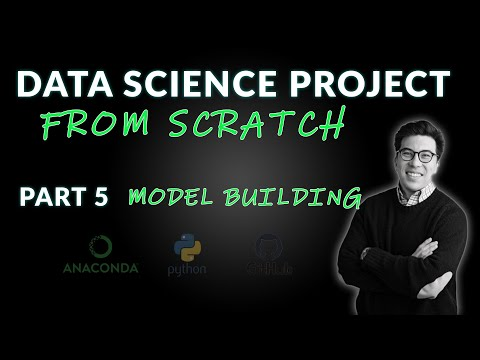

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('7O4dpR9QMIM')

### Librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

### Dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/PlayingNumbers/ds_salary_proj/master/eda_data.csv")
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,47,1,0,0,0,1,data scientist,na,2536,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,36,1,0,0,0,0,data scientist,na,4783,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,10,1,0,1,0,1,data scientist,na,3461,0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,55,1,0,0,0,0,data scientist,na,3883,3
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,22,1,0,0,0,1,data scientist,na,2728,3


### Columnas a utilizar

In [3]:
df_modelo= df[['avg_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','num_comp','hourly','employer_provided',
             'job_state','same_state','age','python_yn','spark','aws','excel','job_simp','seniority','desc_len']]
df_modelo.head()

,avg_salary,Rating,Size,Type of ownership,Industry,Sector,Revenue,num_comp,hourly,employer_provided,job_state,same_state,age,python_yn,spark,aws,excel,job_simp,seniority,desc_len
0,72.0,3.8,501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,0,0,NM,0,47,1,0,0,1,data scientist,na,2536
1,87.5,3.4,10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,0,MD,0,36,1,0,0,0,data scientist,na,4783
2,85.0,4.8,501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),0,0,0,FL,1,10,1,1,0,1,data scientist,na,3461
3,76.5,3.8,1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),3,0,0,WA,1,55,1,0,0,0,data scientist,na,3883
4,114.5,2.9,51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,3,0,0,NY,1,22,1,0,0,1,data scientist,na,2728


### Get Dummies

In [4]:
df_dummies = pd.get_dummies(df_modelo)

### Feature and Response (X-y)

In [5]:
X = df_dummies.drop('avg_salary', axis ='columns')
y = df_dummies.avg_salary.values
X.shape , y.shape

((742, 177), (742,))

### Dividir los datos en: Train/Test 20% de entrenamiento

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size= 0.2, random_state= 42)

### Modelos
- [x] LinearRegression
- [x] SVR
- [x] DecisionTreeRegressor
- [x] RandomForest

In [8]:
#modelo LinearRegression.... %time es para ver el tiempo que dura el modelo
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
%time lr.fit(X_train, y_train)

Wall time: 81 ms


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
#predecir modelo lienar
lr_pred = lr.predict(X_test)

In [10]:
#modelo SVR, svm-> support vector machine....
from sklearn.svm import SVR
%time svr = SVR(gamma='auto')
svr.fit(X_train, y_train)

Wall time: 0 ns


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [11]:
#prediecir
svr_pred = svr.predict(X_test)

In [12]:
#DecisionTreeregressor
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
%time dtr.fit(X_train, y_train)

Wall time: 54 ms


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [13]:
#predicc model
dtr_pred = dtr.predict(X_test)

In [14]:
#Modelo Random_forest
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100)
%time rfr.fit(X_train, y_train)

Wall time: 2.4 s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [15]:
#predict model
rfr_pred = rfr.predict(X_test)

### Metrícas de Rendimiento
- [X] RSME-error cuadrático medio
- [X] MAE- eror absoluto medio
- [X] $R^2$

In [16]:
#librerias
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [17]:
print('Error Quadratico medio:')
print("RSME_LinearRegressor = ",sqrt(mean_squared_error(y_test, lr_pred)))
print("RSME_SVR = ", sqrt(mean_squared_error(y_test, svr_pred)))
print("RSME_DecisionTreeRegressor = ", sqrt(mean_squared_error(y_test, dtr_pred)))
print("RSME_RandomForestRegressor = ",sqrt( mean_squared_error(y_test, rfr_pred)))

Error Quadratico medio:
RSME_LinearRegressor =  26.250051841262252
RSME_SVR =  40.290869472632956
RSME_DecisionTreeRegressor =  24.249749185722926
RSME_RandomForestRegressor =  18.45484472868118


In [18]:
print('Error absoluto medio: ')
print("MAE_LinearRegressor = ", mean_squared_error(y_test, lr_pred))
print("MAE_SVR = ", mean_squared_error(y_test, svr_pred))
print("MAE_DecisionTreeRegressor = ", mean_squared_error(y_test, dtr_pred))
print("MAE_RandomForestRegressor = ", mean_squared_error(y_test, rfr_pred))

Error absoluto medio: 
MAE_LinearRegressor =  689.0652216689558
MAE_SVR =  1623.3541628607463
MAE_DecisionTreeRegressor =  588.0503355704698
MAE_RandomForestRegressor =  340.58129395973157


In [19]:
print('R2_score: ')
print("R2_LinearRegressor = ", r2_score(y_test, lr_pred))
print("R2_SVR = ",r2_score(y_test, svr_pred))
print("R2_DecisionTreeRegressor = ", r2_score(y_test, dtr_pred))
print("R2_RandomForestRegressor = ", r2_score(y_test, rfr_pred))

R2_score: 
R2_LinearRegressor =  0.5784273460224207
R2_SVR =  0.006825912465596828
R2_DecisionTreeRegressor =  0.640228627359241
R2_RandomForestRegressor =  0.7916311033054844


---
Para fines de practica tomaremos **Random Forest** por su puntación más no asi por el tiempo, ya que para este dataset no obtuvo el mejor performce.   

La metríca de RMSE la mejor puntuación debe de estar cerca de **0.0**, el modelo de ***Random Forest*** saco un ***18.28726905701774*** .  
El MAE la mejor puntación debe de rondar **0.0**, el modelo de ***Random Forest*** obtuvo el mejor con ***334.4242095637584***.  
$R^2$_score la mejor puntuación posible debe de ser de **1.0**, y el estimdor ***Random Forest*** obtuvo ***0.7953980303364083***.  

Pero en cuanto  el mas lento de los demás con ***2.42 s***  

---

### Tuning Hypermarameters
- [x] GridSearchCV
- [x] RandomizedSearchCV

In [20]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV

In [21]:
#Crear los parametros a evaluar
n_estimators = [100, 200, 300, 500, 800]
max_features=['auto', 'sqrt']
#crear un diccionario con los parametros
param_grid = dict(n_estimators=n_estimators, max_features= max_features)

In [22]:
grid = GridSearchCV(rfr, param_grid=param_grid, cv= 10, return_train_score=False)
grid.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100, 200, 300, 500, 800], 'max_features': ['auto', 'sqrt']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring=None, verbose=0)

In [23]:
grid.best_score_

0.7122450612340624

In [24]:
grid.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [25]:
#RandomizedSaerhCV 
from sklearn.model_selection import RandomizedSearchCV

In [26]:
n_estimators = [300, 500, 800]
max_features=['auto', 'sqrt']
param_dist = dict(n_estimators=n_estimators, max_features= max_features)

In [27]:
rand = RandomizedSearchCV(rfr, param_dist ,n_iter = 5, cv= 5, return_train_score=False)
rand.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=5, n_jobs=None,
          param_distributions={'n_estimators': [300, 500, 800], 'max_features': ['auto', 'sqrt']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=False, scoring=None, verbose=0)

In [28]:
rand.best_score_

0.7174201997398476

In [29]:
rand.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

**Podemos predecir con entrenar y predecir con el mejor estimador y salvar nuestro modelo para colocarlo en producción**